In [1]:
# 1: Figure out what the 'Pagila' database is
# 2: Create some data visualizations that you believe would be relevant to whoever owns this data

In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = psycopg2.connect(dbname = "postgres",
                  user = "postgres",
                  password = "password",
                  host = "localhost",
                  port = "5432")

In [4]:
cursor = conn.cursor()

In [5]:
cursor.execute("SELECT name, COUNT(*) as Total FROM category INNER JOIN film_category ON category.category_id = film_category.category_id GROUP BY name ORDER BY Total DESC;")
rows = cursor.fetchall()

for row in rows:
    print(row)

('Sports', 74)
('Foreign', 73)
('Family', 69)
('Documentary', 68)
('Animation', 66)
('Action', 64)
('New', 63)
('Drama', 62)
('Sci-Fi', 61)
('Games', 61)
('Children', 60)
('Comedy', 58)
('Travel', 57)
('Classics', 57)
('Horror', 56)
('Music', 51)


In [6]:
df = pd.DataFrame(rows)
df.columns = ["genre", "total"]

display(df)
print(df.dtypes)

,genre,total
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Sci-Fi,61
9,Games,61


genre    object
total     int64
dtype: object


<Axes: title={'center': 'Total Films by Genre'}, ylabel='total'>

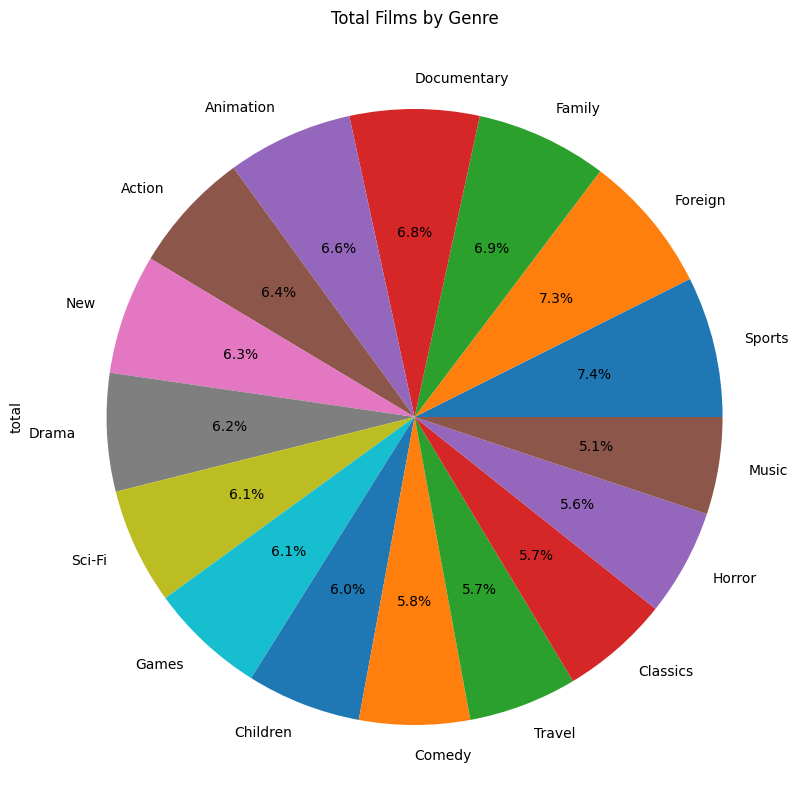

In [7]:
df.plot.pie(y="total", labels=df["genre"], autopct='%1.1f%%', legend=False, title="Total Films by Genre", figsize=(12,10),)